In [97]:
import os
import sys
import pandas as pd
import numpy as np
import math

## Trial on my stock price data

In [58]:
#based on: https://www.youtube.com/watch?v=c0k-YLQGKjY
#format:
##         X           Y
## [[[1],[2],[3],[4]] [5]

def df_to_windowed_df(dataframe,windowSize=3):
  data=dataframe.to_numpy()
  X=[]
  Y=[]
  
  for i in range(0,len(data)-windowSize):
    nth=[[a[0],a[1]] for a in data[i:i+windowSize]]
    # print(nth)
    X.append(nth)
    Y.append(data[i+windowSize])
  
  return np.array(X),np.array(Y)
    
## history of tesla share prices
filepath="TSLA.csv"
df=pd.read_csv(filepath)

df.Date = pd.to_datetime(df.Date).astype('int64') / 10**9

X,Y=df_to_windowed_df(df,windowSize=3)

In [61]:
print(X.shape, Y.shape)
print(df.shape)

(3377, 3, 2) (3377, 2)
(3380, 2)


In [88]:
def splitDataset(X,Y,threshold=0.8,valsize=0.01): 
    #threshold means 80% is split train/val
    # valsize means 1% never sees the model in val or training; this is taken from the val side, so val is actually size = 1-threshold-valsize
    threshold_index=round(X.shape[0]*(threshold+valsize))
    valindex=round(X.shape[0]*(1-valsize))
    
    x_train=X[:threshold_index]
    y_train=Y[:threshold_index]
    
    x_val=X[threshold_index:valindex]
    y_val=Y[threshold_index:valindex]
    
    x_test=X[valindex:]
    y_test=Y[valindex:]
    
    return x_train,y_train,x_val,y_val,x_test,y_test

x_train,y_train,x_val,y_val,x_test,y_test=splitDataset(X,Y)

In [105]:
###Normalize the data!
x_tr_norm=tf.keras.utils.normalize(x_train,axis=0)
y_tr_norm=tf.keras.utils.normalize(y_train,axis=0)

x_val_n=tf.keras.utils.normalize(x_val,axis=0)
y_val_n=tf.keras.utils.normalize(y_val,axis=0)

x_test_n=tf.keras.utils.normalize(x_test,axis=0)
y_test_n=tf.keras.utils.normalize(y_test,axis=0)

# print(x_tr_norm.shape,x_test_n.shape)
# # print(x_tr_norm[0],y_tr_norm[0])
# print((x_tr_norm.shape[1],x_tr_norm.shape[2]))


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [109]:
model=tf.keras.Sequential()

model.add(InputLayer((x_tr_norm.shape[1],x_tr_norm.shape[2])))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17152     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logspath=os.path.join('logs','model_init')
cp=ModelCheckpoint(logspath,save_best_only=True)
model.compile(loss='mse', optimizer=Adam())


In [121]:

history=model.fit(x_train,y_train,epochs=40,validation_data=(x_val,y_val),callbacks=cp)
# model.fit()

Epoch 1/40
80/86 [==========================>...] - ETA: 0s - loss: 1056235056265166848.0000

INFO:tensorflow:Assets written to: logs/model\assets


INFO:tensorflow:Assets written to: logs/model\assets


86/86 [==============================] - 12s 98ms/step - loss: 1055392143163523072.0000 - val_loss: 1376418545990107136.0000
Epoch 2/40
86/86 [==============================] - 0s 5ms/step - loss: 1055392143163523072.0000 - val_loss: 1376418545990107136.0000
Epoch 3/40
83/86 [===========================>..] - ETA: 0s - loss: 1055670182166396928.0000

INFO:tensorflow:Assets written to: logs/model\assets


INFO:tensorflow:Assets written to: logs/model\assets


86/86 [==============================] - 8s 93ms/step - loss: 1055391937005092864.0000 - val_loss: 1376418408551153664.0000
Epoch 4/40
86/86 [==============================] - 1s 6ms/step - loss: 1055391799566139392.0000 - val_loss: 1376418408551153664.0000
Epoch 5/40
86/86 [==============================] - 1s 8ms/step - loss: 1055392211882999808.0000 - val_loss: 1376418408551153664.0000
Epoch 6/40
86/86 [==============================] - 1s 7ms/step - loss: 1055392211882999808.0000 - val_loss: 1376418408551153664.0000
Epoch 7/40
86/86 [==============================] - 1s 6ms/step - loss: 1055391593407709184.0000 - val_loss: 1376418408551153664.0000
Epoch 8/40
86/86 [==============================] - 1s 6ms/step - loss: 1055391799566139392.0000 - val_loss: 1376418408551153664.0000
Epoch 9/40
82/86 [===========================>..] - ETA: 0s - loss: 1055248107140284416.0000

INFO:tensorflow:Assets written to: logs/model\assets


INFO:tensorflow:Assets written to: logs/model\assets


86/86 [==============================] - 28s 330ms/step - loss: 1055392005724569600.0000 - val_loss: 1376418133673246720.0000
Epoch 10/40
86/86 [==============================] - 2s 18ms/step - loss: 1055391799566139392.0000 - val_loss: 1376418133673246720.0000
Epoch 11/40
86/86 [==============================] - 2s 17ms/step - loss: 1055391730846662656.0000 - val_loss: 1376418133673246720.0000
Epoch 12/40
86/86 [==============================] - 2s 18ms/step - loss: 1055392005724569600.0000 - val_loss: 1376418133673246720.0000
Epoch 13/40
86/86 [==============================] - 2s 18ms/step - loss: 1055391937005092864.0000 - val_loss: 1376418133673246720.0000
Epoch 14/40
86/86 [==============================] - 2s 18ms/step - loss: 1055391799566139392.0000 - val_loss: 1376418133673246720.0000
Epoch 15/40
84/86 [============================>.] - ETA: 0s - loss: 1055200553262383104.0000

In [119]:
from tensorflow.keras.models import load_model
model=load_model('model/'')

SyntaxError: unterminated string literal (detected at line 2) (538482940.py, line 2)

In [116]:
train_predictions=model.predict(x_train).flatten()
train_results=pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals':y_train})
train_results

86/86 [==============================] - 2s 4ms/step


ValueError: Per-column arrays must each be 1-dimensional

In [93]:
## Check for overfitting
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

NameError: name 'history' is not defined

In [85]:
## evaluate the model

testscore=model.evaluate(x_test_reshaped,y_test_n)
print(testscore)

1/1 [==============================] - 0s 20ms/step - loss: 4.3051e-04
0.000430507876444608


1/1 [==============================] - 0s 21ms/step
(30, 5)


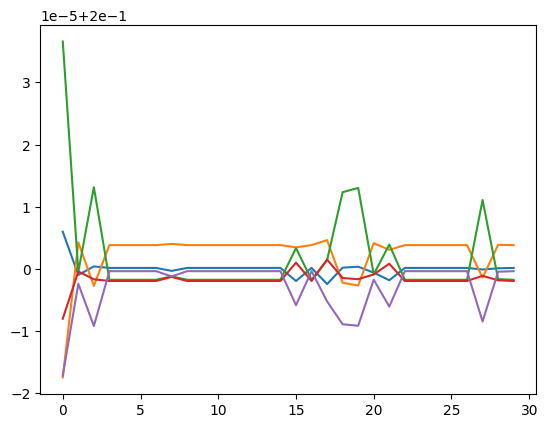

In [91]:
# now check if the model is working: make some predictions
# based on the last 30 points that didnt get passed into traning of validation.

predictions=model.predict(x_test_reshaped)

print(predictions.shape)
plt.plot(predictions)
plt.show()

In [105]:
# print(x_train)
print(x_train.shape)
print(x_train[:,0])

(2680, 2)
[1.2777696e+09 1.2778560e+09 1.2779424e+09 ... 1.6135200e+09 1.6136064e+09
 1.6136928e+09]


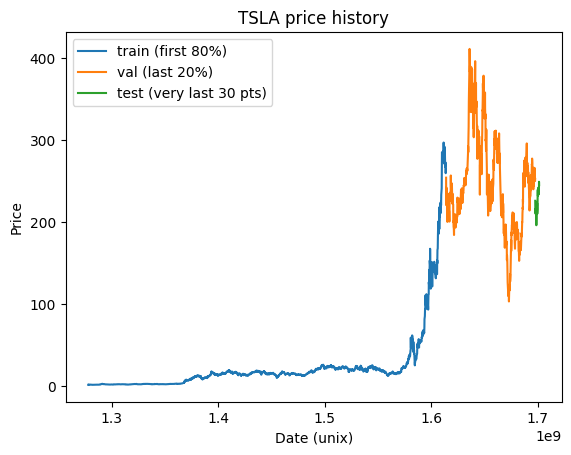

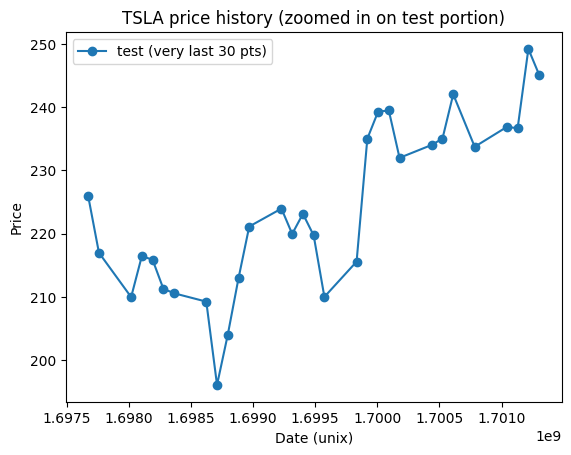

In [114]:
#Plot the real stock prices
plt.plot(x_train[:,0],y_train,label="train (first 80%)")
plt.plot(x_val[:,0],y_val,label="val (last 20%)")
plt.plot(x_test[:,0],y_test,label="test (very last 30 pts)")
plt.title('TSLA price history')
plt.ylabel('Price')
plt.xlabel('Date (unix)')
plt.legend() 
plt.show()

plt.plot(x_test[:,0],y_test,label="test (very last 30 pts)",marker='o')
plt.title('TSLA price history (zoomed in on test portion)')
plt.ylabel('Price')
plt.xlabel('Date (unix)')
plt.legend() 
plt.show()